# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
#Your code here
df=pd.read_csv("homepage_actions.csv")
df

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view
8185,2017-01-18 10:01:09.026482,458115,experiment,view
8186,2017-01-18 10:08:51.588469,505451,control,view


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [98]:
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [99]:
viewers = df[df['action'] == "view"]
viewers

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view
8185,2017-01-18 10:01:09.026482,458115,experiment,view
8186,2017-01-18 10:08:51.588469,505451,control,view


In [100]:
view_clickers=df[df['action'] == "click"]
view_clickers

,timestamp,id,group,action
8,2016-09-24 20:58:01.948663,349125,experiment,click
12,2016-09-24 21:06:27.553057,601714,experiment,click
15,2016-09-24 21:30:02.739756,487634,experiment,click
17,2016-09-24 23:01:12.108316,468601,experiment,click
21,2016-09-25 00:01:47.933853,555973,experiment,click
...,...,...,...,...
8162,2017-01-17 23:20:35.483601,451198,control,click
8164,2017-01-17 23:47:58.209653,252195,control,click
8167,2017-01-18 00:56:24.554729,344770,experiment,click
8180,2017-01-18 08:54:56.879682,615849,experiment,click


In [101]:
non_view_clickers = df[df['action'] == "click"] == df[df["action"] != "view"]
non_view_clickers.sum()

timestamp    1860
id           1860
group        1860
action       1860
dtype: int64

In [102]:
df['group'].value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

In [103]:
df.isnull().sum()

timestamp    0
id           0
group        0
action       0
dtype: int64

In [104]:
df.describe()

,id
count,8188.000000
mean,564699.749878
std,219085.845672
min,182988.000000
25%,373637.500000
50%,566840.500000
75%,758078.000000
max,937217.000000


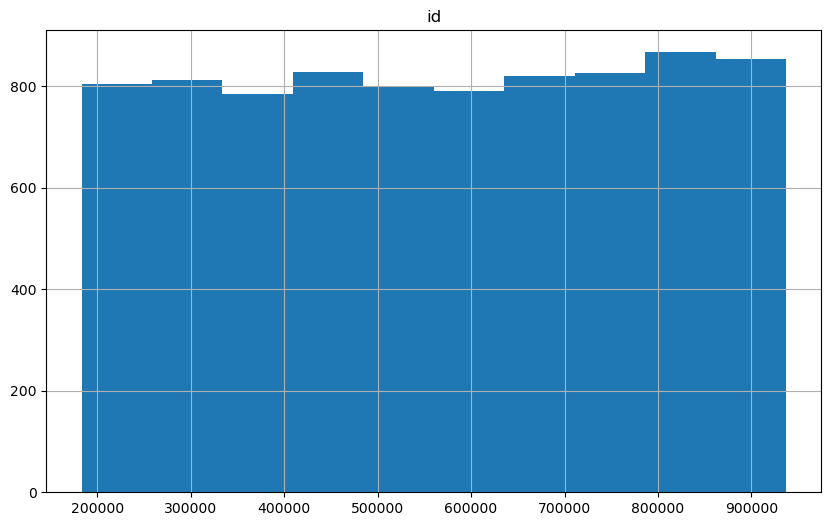

In [105]:
df.hist(figsize=(10, 6))
plt.show()

In [106]:
non_view_clickers = df[df['action'] == "click"] == df[df["action"] != "view"]
non_view_clickers.value_counts().sum()

1860

In [107]:
non_click_viewers = df[df['action'] == "view"].value_counts().sum() - non_view_clickers.value_counts().sum()
non_click_viewers

4468

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

## Hypothesis
Ho - The experimental homepage is not effective as the control group
H1 - The experimental homepage is more effective than the control group

In [108]:
#Your code here
exp_df = df[df['group'] == 'experimental']
con_df = df[df['group'] == 'control']

In [109]:
#exp_mean = exp_df['id'].mean()
#con_mean = con_df['id'].mean()

In [110]:
experiment_df = df[df["group"] == "experiment"]
control_df = df[df["group"] == "control"]
print(control_df['id'].mean())
print(experiment_df['id'].mean())

562817.7164634146
566744.8544852191


In [111]:
control_group['id'].std()

NameError: name 'control_group' is not defined

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [ ]:
control_rate = control.click.mean()
expected_experiment_clicks_under_null = control_rate * len(experiment)
print(expected_experiment_clicks_under_null)

NameError: name 'control' is not defined

In [ ]:
#Your code here
import numpy as np
con_ctr = con_df[con_df['action'] == 'click']['id'].unique() / con_df[con_df['action'] == 'view']['id'].nunique()
exp_expected_clicks = exp_df[exp_df['action'] == 'view']['id'].nunique() * con_ctr

print(f" {exp_expected_clicks:.2f}.")

TypeError: unsupported format string passed to numpy.ndarray.__format__

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [ ]:
#Your code here
# Estimated CTR
ctr = 0.5

# Number of pageviews
pageviews = 1000

# Expected number of clicks
expected_clicks = ctr * pageviews

# Filter the 'click' actions
clicks = df[df['action'] == 'click']
# Count the number of clicks
actual_clicks = clicks.shape[0]
# Calculate the variance of the number of clicks
click_var = actual_clicks * (1 - ctr) * ctr

# Calculate the standard deviation of the number of clicks
click_std = click_var ** 0.5
click_var, click_std

(465.0, 21.563858652847824)

In [ ]:
actual_experiment_clicks = experiment.click.sum()
z_score = (actual_experiment_clicks - expected_experiment_clicks_under_null)/click_std
print(z_score)

NameError: name 'experiment' is not defined

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [ ]:
import scipy.stats as stats
p_val = stats.norm.sf(z_score) #or 1 - stats.norm.cdf(z_score)
print(p_val)

1.0


In [ ]:
#Your code here
import scipy.stats as st
import math

# insert z-score here
mean = 564699.749878
x = 346740 # assume that the mean is given as follows:
std_dev = 219085.845672
n = 3000
z_score = (x - mean) / (std_dev / math.sqrt(n))

standard_error = std_dev / (n ** 0.5)
p_value = st.norm.sf(abs(z_score)) * 2

# Multiply by 2 for a two-tailed test
# sf is the survival function (1-CDF) and we take the absolute value of the z-score for a two-tailed test

print("The p-value is:", p_value)

The p-value is: 0.0


### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **No, it doesn't, since the p_value is zero and hence less than the significance level, the null hypothesis is rejected in favour of the alternative**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.